# House Price Prediction Using Supervised ML Regression Models

Course: Supervised Learning: Regression by IBM/Coursera <br>
Author: [Kanishk Kumar](https://www.linkedin.com/in/kanishkkumar11/)
<hr>

#### Contents
* [Introduction](#intro)
  * [Background](#back)
  * [Objective](#obj)
* [Data](#data)
  * [Data Collection](#col)
  * [Data Description](#descr)
  * [Data Wrangling](#wrang)
* [Exploratory Data Analysis](#eda)
  * [Target Variable Distribution](#tvd)
  * [Correlation Between Variables](#cbv)
  * [Relationship Between the Target Variable and Other Variables](#rbtv)
  * [Relationship in-between Predictor Variables](#rbpv)
* [Feature Engineering](#fe)
  * [Creating New Derived Features](#cndf)
  * [Dealing with Ordinal Variables](#dov)
  * [One-Hot Encoding For Categorical Features](#ohe)
* [Prediction Type and Modeling Techniques](#ptmt)
* [Model Building and Evaluation](#mbe)
  * [Feature Scaling](#fs)
  * [Splitting the Dataset](#std)
  * [Modeling Approach](#ma)
  * [Performance Metric](#pm)
  * [Modeling](#m)
   * [Ridge](#rr)
   * [Lasso](#lr)
   * [Elastic Net](#en)
  * [Analysis and Comparison](#ac)
  * [Performance Interpretation](#pi)
  * [Feature Importances](#fi)
* [Key Findings](#kf)
* [Conclusion](#c)

# Introduction <a name="intro"></a>
<hr>

## Background <a name="back"></a>
Real estate is a lucrative business. Thousands of houses are sold everyday. There are some questions every buyer asks himself like: What is the actual price that this house deserves? Am I paying a fair price? In this project, a machine learning model is proposed to predict a house price based on data related to the house (its size, the year it was built in, etc.). During the development and evaluation of our model, I will show the code used for each step followed by its output. In this study, Python programming language with a number of Python packages will be used.

## Objective <a name="obj"></a>
This project will be focused on __prediction.__ The main objectives of this project are as follows:

- To apply data preprocessing and preparation techniques in order to obtain clean data.
- To build at least three supervised machine learning regression models that are able to predict house price based on house features.
- To analyze and compare model's performance in order to choose the best model.

# Data <a name="data"></a>
<hr>

## Data Collection <a name="col"></a>
In this project, I will use a housing dataset presented by De Cock (2011). This dataset describes the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a large number of variables that are involved in determining a house price. I obtained a .csv copy of the data from [here.](https://www.kaggle.com/prevek18/ames-housing-dataset)

## Data Description <a name="descr"></a>

The dataset contains `2930` records (rows) and `82` features (columns).

Here, I will provide a brief description of dataset features. Since the number of features is large (82), I will attach the original data description file to the project report for more information about the dataset. Now, I will mention the feature name with a short description of its meaning.

|Feature|Description|
|-------|-----------|
|MSSubClass| The type of the house involved in the sale|
|MSZoning| The general zoning classification of the sale|
|LotFrontage| Linear feet of street connected to the house|
|LotArea| Lot size in square feet|
|Street| Type of road access to the house|
|Alley| Type of alley access to the house|
|LotShape| General shape of the house|
|LandContour| House flatness|
|Utilities| Type of utilities available|
|LotConfig| Lot configuration|
|LandSlope| House Slope|
|Neighborhood| Locations within Ames city limits|
|Condition1| Proximity to various conditions|
|Condition2| Proximity to various conditions (if more than one is present)|
|BldgType| House type|
|HouseStyle| House style|
|OverallQual| Overall quality of material and finish of the house|
|OverallCond| Overall condition of the house|
|YearBuilt| Construction year|
|YearRemodAdd| Remodel year (if no remodeling nor addition, same as YearBuilt)|
|RoofStyle| Roof type|
|RoofMatl| Roof material|
|Exterior1st| Exterior covering on house|
|Exterior2nd| Exterior covering on house (if more than one material)|
|MasVnrType| Type of masonry veneer|
|MasVnrArea| Masonry veneer area in square feet|
|ExterQual| Quality of the material on the exterior|
|ExterCond| Condition of the material on the exterior|
|Foundation| Foundation type|
|BsmtQual| Basement height|
|BsmtCond| Basement Condition|
|BsmtExposure| Refers to walkout or garden level walls|
|BsmtFinType1| Rating of basement finished area|
|BsmtFinSF1| Type 1 finished square feet|
|BsmtFinType2| Rating of basement finished area (if multiple types)|
|BsmtFinSF2| Type 2 finished square feet|
|BsmtUnfSF| Unfinished basement area in square feet|
|TotalBsmtSF| Total basement area in square feet|
|Heating| Heating type|
|HeatingQC| Heating quality and condition|
|CentralAir| Central air conditioning|
|Electrical| Electrical system type|
|1stFlrSF| First floor area in square feet|
|2ndFlrSF| Second floor area in square feet|
|LowQualFinSF| Low quality finished square feet in all floors|
|GrLivArea| Above-ground living area in square feet|
|BsmtFullBath| Basement full bathrooms|
|BsmtHalfBath| Basement half bathrooms|
|FullBath| Full bathrooms above ground|
|HalfBath| Half bathrooms above ground|
|Bedroom| Bedrooms above ground|
|Kitchen| Kitchens above ground|
|KitchenQual| Kitchen quality|
|TotRmsAbvGrd| Total rooms above ground (excluding bathrooms)|
|Functional| Home functionality|
|Fireplaces| Number of fireplaces|
|FireplaceQu| Fireplace quality|
|GarageType| Garage location|
|GarageYrBlt| Year garage was built in|
|GarageFinish| Interior finish of the garage|
|GarageCars| Size of garage (in car capacity)|
|GarageArea| Garage size in square feet|
|GarageQual| Garage quality|
|GarageCond| Garage condition|
|PavedDrive| How driveway is paved|
|WoodDeckSF| Wood deck area in square feet|
|OpenPorchSF| Open porch area in square feet|
|EnclosedPorch| Enclosed porch area in square feet|
|3SsnPorch| Three season porch area in square feet|
|ScreenPorch| Screen porch area in square feet|
|PoolArea| Pool area in square feet|
|PoolQC| Pool quality|
|Fence| Fence quality|
|MiscFeature| Miscellaneous feature|
|MiscVal| Value of miscellaneous feature|
|MoSold| Sale month|
|YrSold| Sale year|
|SaleType| Sale type|
|SaleCondition| Sale condition|

## Data Wrangling <a name="wrang"></a>

Let's import all the necessary libraries before we proceed.

In [1]:
#Analysis
import pandas as pd

#Visualization
from matplotlib import pyplot as plt
import seaborn as sns

#Scientific
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Ignoring unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

#Magic Functions
%matplotlib inline

The first step is reading the dataset from the .csv file I've downloaded. I'll use the read_csv() function from Pandas Python package:

In [2]:
dataset = pd.read_csv("data/AmesHousing.csv")

Let's display the first few rows of the dataset:

In [3]:
# Configuring float numbers format
pd.options.display.float_format = '{:20.2f}'.format
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,nan,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Now, let's get statistical information about the numeric columns in our dataset. We want to know the mean, the standard deviation, the minimum, the maximum, and the 50th percentile (the median) for *each numeric column* in the dataset:

In [4]:
dataset.describe(include=[np.number], percentiles=[.5]) \
    .transpose() \
    .drop("count", axis=1)

,mean,std,min,50%,max
Order,1465.50,845.96,1.00,1465.50,2930.00
PID,714464496.99,188730844.65,526301100.00,535453620.00,1007100110.00
MS SubClass,57.39,42.64,20.00,50.00,190.00
Lot Frontage,69.22,23.37,21.00,68.00,313.00
Lot Area,10147.92,7880.02,1300.00,9436.50,215245.00
Overall Qual,6.09,1.41,1.00,6.00,10.00
Overall Cond,5.56,1.11,1.00,5.00,9.00
Year Built,1971.36,30.25,1872.00,1973.00,2010.00
Year Remod/Add,1984.27,20.86,1950.00,1993.00,2010.00
Mas Vnr Area,101.90,179.11,0.00,0.00,1600.00


From the table above, we can see, for example, that the average lot area of the houses in our dataset is 10,147.92 ft<sup>2</sup> with a standard deviation of 7,880.02 ft<sup>2</sup>. We can see also that the minimum lot area is 1,300 ft<sup>2</sup> and the maximum lot area is 215,245 ft<sup>2</sup> with a median of 9,436.5 ft<sup>2</sup>. Similarly, we can get a lot of information about our dataset variables from the table.

Then, we move to see statistical information about the non-numerical columns in our dataset:

In [5]:
dataset.describe(include=[np.object]) \
    .transpose()

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


In the table we got, `count` represents the number of non-null values in each column, `unique` represents the number of unique values, `top` represents the most frequent element, and `freq` represents the frequency of the most frequent element.

### Dealing with Missing Values

We should deal with the problem of missing values because some machine learning models don't accept data with missing values. Firstly, let's see the number of missing values in our dataset. We want to see the number and the percentage of missing values for each column that actually contains missing values.

In [6]:
# Getting the number of missing values in each column
num_missing = dataset.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


Now we start dealing with these missing values.

##### Pool QC

The percentage of missing values in `Pool QC` column is 99.56% which is very high. I think that a missing value in this column denotes that the corresponding house doesn't have a pool. To verify this, let's take a look at the values of `Pool Area` column:

In [7]:
dataset["Pool Area"].value_counts()

0      2917
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: Pool Area, dtype: int64

We can see that there are 2917 entries in `Pool Area` column that have a value of 0. This verfies my hypothesis that each house without a pool has a missing value in `Pool QC` column and a value of 0 in `Pool Area` column. So let's fill the missing values in `Pool QC` column with `"No Pool"`:

In [8]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

##### Misc Feature

The percentage of missing values in Pool QC column is 96.38% which is very high also. Let's take a look at the values of `Misc Val` column:

In [9]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
650         3
1200        3
1500        3
4500        2
2500        2
480         2
3000        2
12500       1
300         1
350         1
8300        1
420         1
80          1
54          1
460         1
490         1
3500        1
560         1
17000       1
15500       1
750         1
800         1
900         1
1000        1
1150        1
1300        1
1400        1
1512        1
6500        1
455         1
620         1
Name: Misc Val, dtype: int64

We can see that `Misc Val` column has 2827 entries with a value of 0. `Misc Feature` has 2824 missing values. Then, as with `Pool QC`, we can say that each house without a "miscellaneous feature" has a missing value in `Misc Feature` column and a value of 0 in `Misc Val` column. So let's fill the missing values in `Misc Feature` column with `"No Feature"`:

In [10]:
dataset['Misc Feature'].fillna('No feature', inplace=True)

##### Alley,  Fence, and Fireplace Qu

According to the dataset documentation, `NA` in `Alley`, `Fence`, and `Fireplace Qu` columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with `"No Alley"`, `"No Fence"`, and `"No Fireplace"` accordingly:

In [11]:
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

##### Lot Frontage

`Lot Frontage` represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and we fill in the missing values with 0:

In [12]:
dataset['Lot Frontage'].fillna(0, inplace=True)

##### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

According to the dataset documentation, `NA` in `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Type` indicates that there is no garage in the house. So we fill in the missing values in these columns with `"No Garage"`. We notice that `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Yr Blt` columns have 159 missing values, but `Garage Type` has 157 and both `Garage Cars` and `Garage Area` have one missing value. Let's take a look at the row that contains the missing value in `Garage Cars`:

In [13]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,nan,NaN,nan,nan,NaN,NaN


We can see that this is the same row that contains the missing value in `Garage Area`, and that all garage columns except `Garage Type` are null in this row, so we will fill the missing values in `Garage Cars` and `Garage Area` with 0.

We saw that there are 2 rows where `Garage Type` is not null while `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Yr Blt` columns are null. Let's take a look at these two rows:

In [14]:
dataset[~pd.isna(dataset['Garage Type']) & 
        pd.isna(dataset['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,nan,NaN,1.00,360.00,NaN,NaN
2236,Detchd,nan,NaN,nan,nan,NaN,NaN


We will replace the values of `Garage Type` with `"No Garage"` in these two rows also.

For `Garage Yr Blt`, we will fill in missing values with 0 since this is a numerical column:

In [15]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Garage Type']) & 
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)
    
dataset['Garage Yr Blt'].fillna(0, inplace=True)

##### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1


According to the dataset documentation, `NA` in any of the first five of these columns indicates that there is no basement in the house. So we fill in the missing values in these columns with `"No Basement"`. We notice that the first five of these columns have 80 missing values, but `BsmtFin Type 2` has 81, `Bsmt Exposure` has 83, `Bsmt Half Bath` and `Bsmt Full Bath` each has 2, and each of the others has 1. Let's take a look at the rows where `Bsmt Half Bath` is null:

In [16]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan
1497,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,nan,nan


We can see that these are the same rows that contain the missing values in `Bsmt Full Bath`, and that one of these two rows contains the missing value in each of `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns. We notice also that `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are null in these rows, so we will fill the missing values in `Bsmt Half Bath`, `Bsmt Full Bath`, `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns with 0.

We saw that there are 3 rows where `Bsmt Exposure` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null. Let's take a look at these three rows:

In [17]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.00,Unf,0.00,1595.00,1595.00,0.00,0.00
1796,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
2779,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


We will fill in the missing values in `Bsmt Exposure` for these three rows with `"No"`. According to the dataset documentation, `"No"` for `Bsmt Exposure` means "No Exposure":

Let's now take a look at the row where `BsmtFin Type 2` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null:

In [18]:
dataset[~pd.isna(dataset['Bsmt Cond']) & 
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


We will fill in the missing value in `BsmtFin Type 2` for this row with `"Unf"`. According to the dataset documentation, `"Unf"` for `BsmtFin Type 2` means "Unfinished":

In [19]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF", 
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

##### Mas Vnr Area and Mas Vnr Type

Each of these two columns have 23 missing values. We will fill in these missing values with `"None"` for `Mas Vnr Type` and with 0 for `Mas Vnr Area`. We use `"None"` for `Mas Vnr Type` because in the dataset documentation, `"None"` for `Mas Vnr Type` means "None" (i.e. no masonry veneer):

In [20]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

##### Electrical

This column has one missing value. We will fill in this value with the mode of this column:

In [21]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

Now let's check if there is any remaining missing value in our dataset:

In [22]:
dataset.isna().values.sum()

0

This means that our dataset is now complete; it doesn't contain any missing value anymore.

### Outlier Removal

In the paper in which our dataset was introduced by De Cock (2011), the author states that there are five unusual values and outliers in the dataset, and encourages the removal of these outliars. He suggested plotting `SalePrice` against `Gr Liv Area` to spot the outliers. We will do that now:

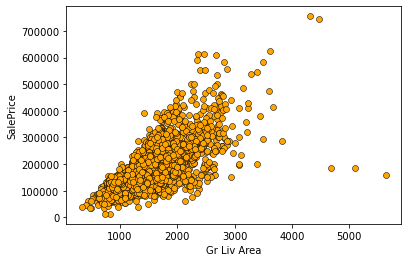

In [23]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

We can clearly see the five values meant by the authour in the plot above. Now, we will remove them from our dataset. We can do so by keeping data points that have `Gr Liv Area` less than 4,000. But first we take a look at the dataset rows that correspond to these unusual values:

In [24]:
outlirt_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlirt_columns]

,Gr Liv Area,Sale Type,Sale Condition,SalePrice
1498,5642,New,Partial,160000
1760,4476,WD,Abnorml,745000
1767,4316,WD,Normal,755000
2180,5095,New,Partial,183850
2181,4676,New,Partial,184750


Now we remove them:

In [25]:
dataset = dataset[dataset["Gr Liv Area"] < 4000]

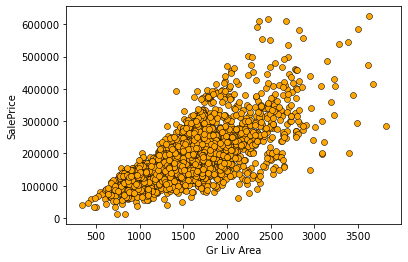

In [26]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

To avoid problems in modeling later, we will reset our dataset index after removing the outlier rows, so no gaps remain in our dataset index:

In [27]:
dataset.reset_index(drop=True, inplace=True)

### Deleting Some Unimportant Columns

We will delete columns that are not useful in our analysis. The columns to be deleted are `Order` and `PID`:

In [28]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

# Exploratory Data Analysis <a name="eda"></a>
<hr>

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

## Target Variable Distribution <a name="tvd"></a>

Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution. First, we start by plotting the violin plot for the target variable. The width of the violin represents the frequency. This means that if a violin is the widest between 300 and 400, then the area between 300 and 400 contains more data points than other areas:

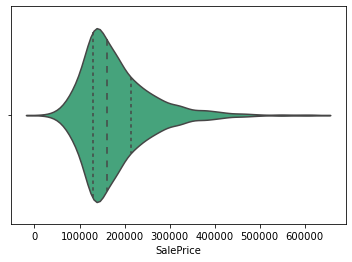

In [29]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3. Now let's see the box plot of `SalePrice`:

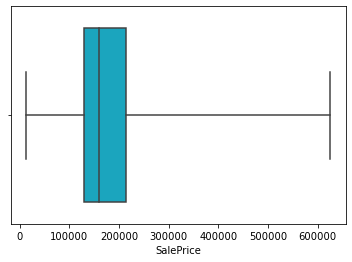

In [30]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

This shows us the minimum and maximum values of `SalePrice`. It shows us also the three quartiles represented by the box and the vertical line inside of it. Lastly, we plot the histogram of the variable to see a more detailed view of the distribution:

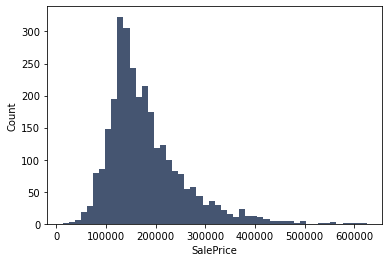

In [31]:
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

## Correlation Between Variables <a name="cbv"></a>

We want to see how the dataset variables are correlated with each other and how predictor variables are correlated with the target variable. For example, we would like to see how `Lot Area` and `SalePrice` are correlated: Do they increase and decrease together (positive correlation)? Does one of them increase when the other decrease or vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

We will show correlation between our dataset variables (numerical and boolean variables only) using a heatmap graph:

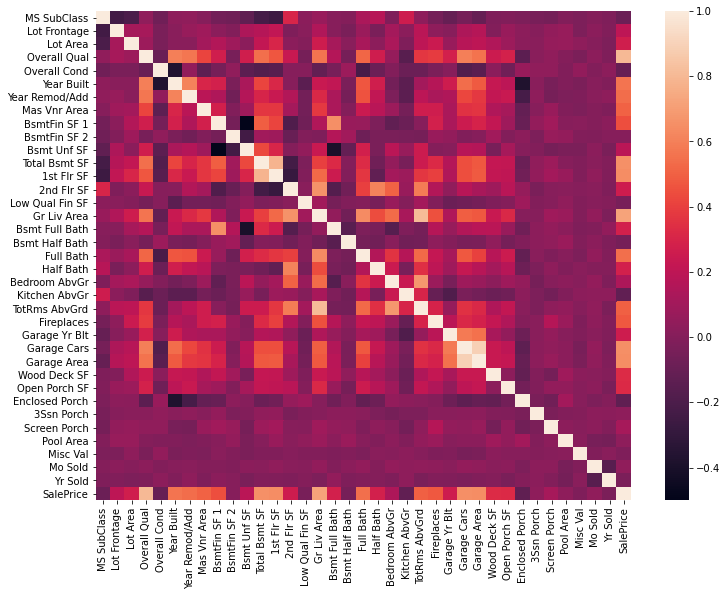

In [32]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(), ax=ax);

We can see that there are many correlated variables in our dataset. We notice that `Garage Cars` and `Garage Area` have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that `Gr Liv Area` and `TotRms AbvGrd` are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too. 

Regarding negative correlation, we can see that `Bsmt Unf SF` is negatively correlated with `BsmtFin SF 1`, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that `Bsmt Unf SF` is negatively correlated with `Bsmt Full Bath` which is reasonable too.

Most importantly, we want to look at the predictor variables that are correlated with the target variable (`SalePrice`). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with `Overall Qual` and `Gr Liv Area`. We see also that the target variable is positively correlated with `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`.

## Relatioships Between the Target Variable and Other Variables <a name="rbtv"></a>

#### High Positive Correlation

Firstly, we want to visualize the relationships between the target variable and the variables that are highly and positively correlated with it, according to what we saw in the heatmap. Namely, these variables are `Overall Qual` and `Gr Liv Area`. We start with the relatioship between the target variable and `Overall Qual`, but before that, let's see the distribution of each of them. Let's start with the target variable `SalePrice`:

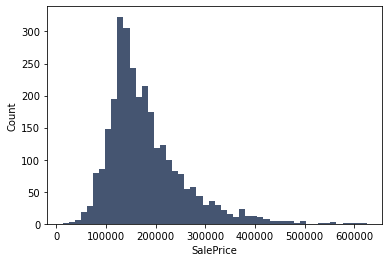

In [33]:
sns.distplot(dataset['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that most house prices fall between 100,000 and 200,000. We see also that there is a number of expensive houses to the right of the plot. Now, we move to see the distribution of `Overall Qual` variable:

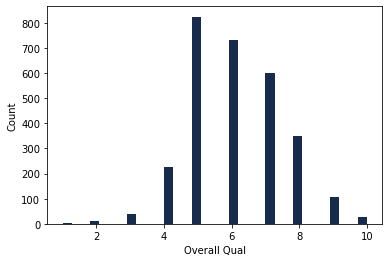

In [34]:
sns.distplot(dataset['Overall Qual'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

We see that `Overall Qual` takes an integer value between 1 and 10, and that most houses have an overall quality between 5 and 7. Now we plot the scatter plot of `SalePrice` and `Overall Qual` to see the relationship between them:

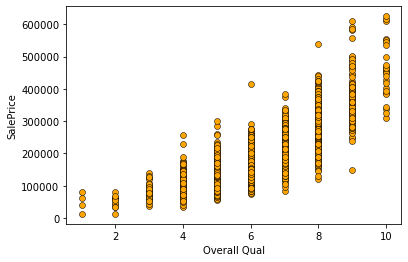

In [35]:
plt.scatter(x=dataset['Overall Qual'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

We can see that they are truly positively correlated; generally, as the overall quality increases, the sale price increases too. This verfies what we got from the heatmap above.

Now, we want to see the relationship between the target variable and `Gr Liv Area` variable which represents the living area above ground. Let us first see the distribution of `Gr Liv Area`:

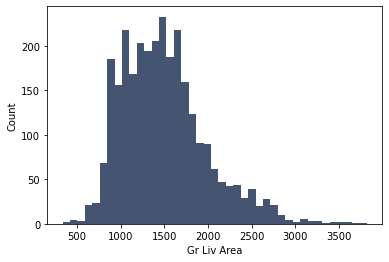

In [36]:
sns.distplot(dataset['Gr Liv Area'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that the above-ground living area falls approximately between 800 and 1800 ft<sup>2</sup>. Now, let us see the relationship between `Gr Liv Area` and the target variable:

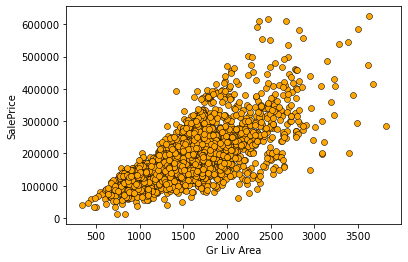

In [37]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

The scatter plot above shows clearly the strong positive correlation between `Gr Liv Area` and `SalePrice` verifying what we found with the heatmap.

#### Moderate Positive Correlation

Next, we want to visualize the relationship between the target variable and the variables that are positively correlated with it, but the correlation is not very strong. Namely, these variables are `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`. We start with the first four. Let us see the distribution of each of them:

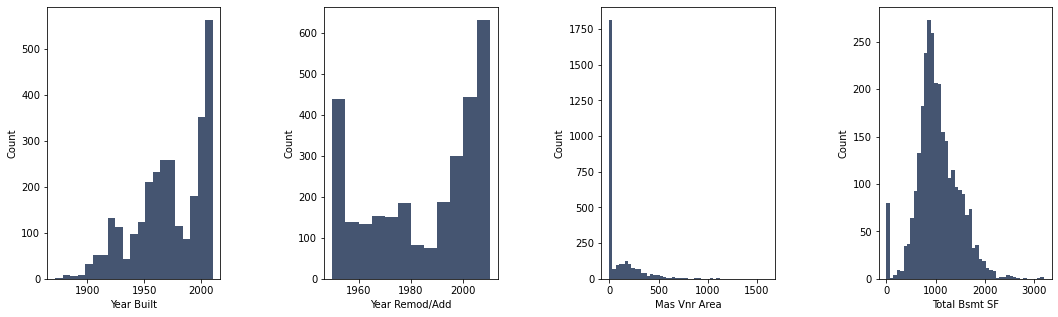

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add", 
                             "Mas Vnr Area", "Total Bsmt SF"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

Now let us see their relationships with the target variable using scatter plots:

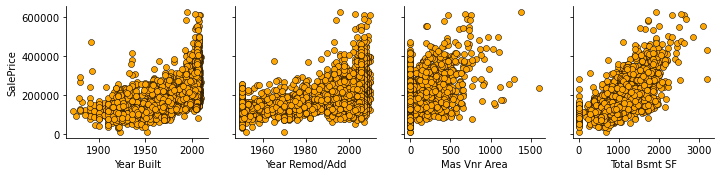

In [39]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

Next, we move to the last four. Let us see the distribution of each of them:

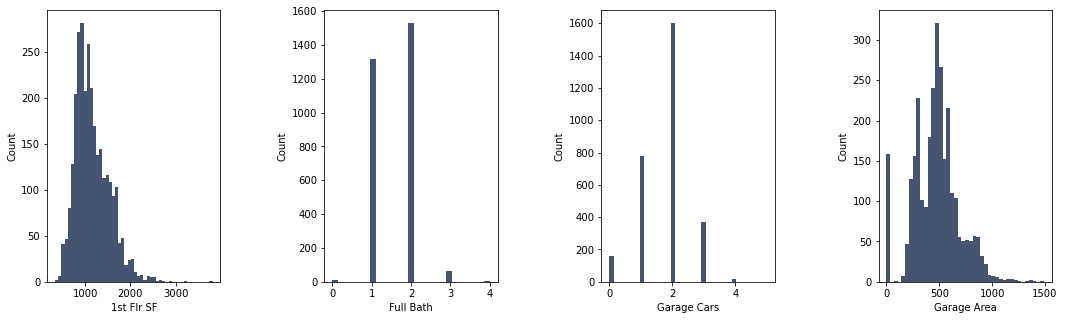

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1st Flr SF", "Full Bath", 
                             "Garage Cars", "Garage Area"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

And now let us see their relationships with the target variable:

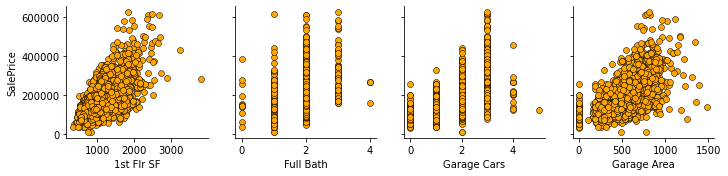

In [41]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

From the plots above, we can see that these eight variables are truly positively correlated with the target variable. However, it's apparent that they are not as highly correlated as `Overall Qual` and `Gr Liv Area`.

## Relationship in-between Predictor Variables <a name="rbpv"></a>

#### Positive Correlation

Apart from the target variable, when we plotted the heatmap, we discovered a high positive correlation between `Garage Cars` and `Garage Area` and between `Gr Liv Area` and `TotRms AbvGrd`. We want to visualize these correlations also. We've already seen the distribution of each of them except for `TotRms AbvGrd`. Let us see the distribution of `TotRms AbvGrd` first:

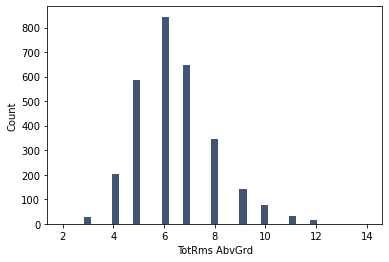

In [42]:
sns.distplot(dataset['TotRms AbvGrd'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Now, we visualize the relationship between `Garage Cars` and `Garage Area` and between `Gr Liv Area` and `TotRms AbvGrd`:

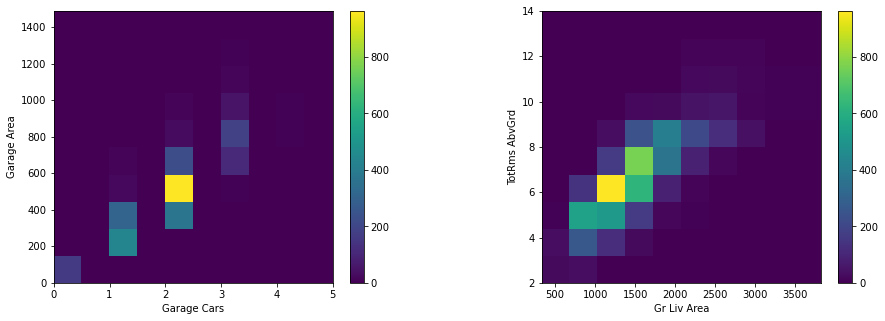

In [43]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"], 
                    dataset["Garage Area"],
                    cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"], 
                    dataset["TotRms AbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

We can see the strong correlation between each pair. For `Garage Cars` and `Garage Area`, we see that the highest concentration of data is when `Garage Cars` is 2 and `Garage Area` is approximately between 450 and 600 ft<sup>2</sup>. For `Gr Liv Area` and `TotRms AbvGrd`, we notice that the highest concentration is when `Garage Liv Area` is roughly between 800 and 2000 ft<sup>2</sup> and `TotRms AbvGrd` is 6.

#### Negative Correlation

When we plotted the heatmap, we also discovered a significant negative correlation between `Bsmt Unf SF` and `BsmtFin SF 1`, and between `Bsmt Unf SF` and `Bsmt Full Bath`. We also want to visualize these correlations. Let us see the distribution of these variables first:

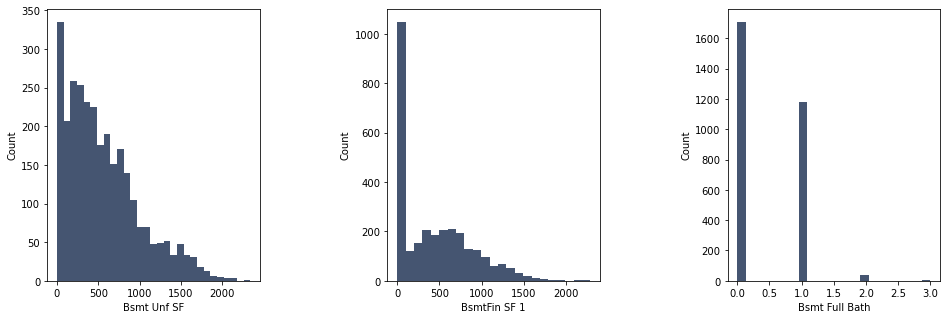

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

Now, we visualize the relationship between each pair using scatter plots:

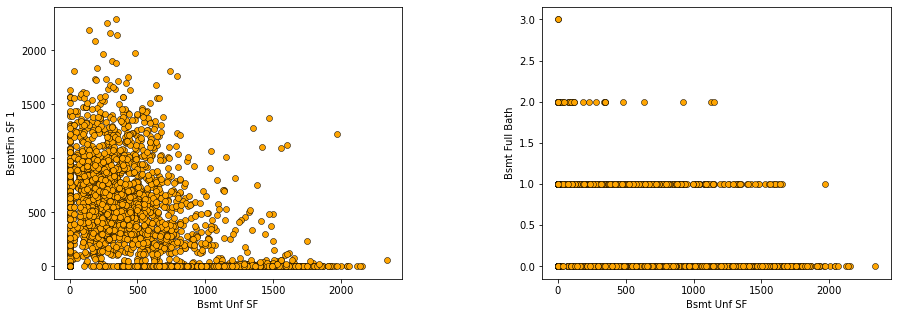

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

From the plots, we can see the negative correlation between each pair of these variables.

We will use the information we got from exploratory data analysis in the next section for feature engineering.

# Feature Engineering <a name="fe"></a>
<hr>

In this section, we will use the insights from Exploratory Data Analysis section to engineer the features of our dataset.

## Creating New Derived Features <a name="cndf"></a>

Firstly, we noticed a high positive correlation between the target variable `SalePrice` and each of `Overall Qual` and `Gr Liv Area`. This gives an indication that the latter two features are very important in predicting the sale price. So, we will create polynomial features out of these features: For each one of these features, we will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, we will create a feature whose values are the product of our two features values:

In [46]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = \
    dataset["Overall Qual"] * dataset["Gr Liv Area"]

Also, we noticed that there are some predictor features that are highly correlated with each other. To avoid the [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) problem, we will delete one feature from each pair of highly correlated predictors. We have two pairs: the first consists of `Garage Cars` and `Garage Area`, and the other consists of `Gr Liv Area` and `TotRms AbvGrd`. For the first pair, we will remove `Garage Cars` feature; from the second pair, we will remove `TotRms AbvGrd` feature:

In [47]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

## Dealing with Ordinal Variables <a name="dov"></a>

There are some ordinal features in our dataset. For example, the `Bsmt Cond` feature has the following possible values: 

In [48]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


Where "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent" according to the dataset documentation. But the problem is that machine learning models will not know that this feature represents a ranking; it will be treated as other categorical features. So to solve this issue, we will map each one of the possible values of this feature to a number. We will map `"No Basement"` to 0, `"Po"` to 1, `"Fa"` to 2, `"TA"` to 3, `"Gd"` to 4, and `"Ex"` to 5.

The ordinal features in the dataset are: `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating QC`, `Central Air`, `Kitchen Qual`, `Functional`, `Fireplace Qu`, `GarageFinish`, `Garage Qual`, `Garage Cond`, `Pool QC`, `Land Slope` and `Fence`. We will map the values of each of them to corresponding numbers as described for `Bsmt Cond` above and in accordance with the dataset documentation:

In [49]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

## One-Hot Encoding For Categorical Features <a name="ohe"></a>

Machine learning models accept only numbers as input, and since our dataset contains categorical features, we need to encode them in order for our dataset to be suitable for modeling. We will encode our categorical features using one-hot encoding technique which transforms the categorical variable into a number of binary variables based on the number of unique categories in the categorical variable; each of the resulting binary variables has only 0 and 1 as its possible values. Pandas package provides a convenient function `get_dummies()` that can be used for performing one-hot encoding on our dataset.

To see what will happen to our dataset, let us take for example the variable `Paved Drive` which indicates how the driveway is paved. It has three possible values: `Y` which means for "Paved", `P` which means "Partial Pavement", and `N` which means "Dirt/Gravel". Let us take a look at `Paved Drive` value for the first few rows in our dataset:

In [50]:
dataset[['Paved Drive']].head()

,Paved Drive
0,P
1,Y
2,Y
3,Y
4,Y


Now, we perform one-hot encoding:

In [51]:
dataset = pd.get_dummies(dataset)

Let us see what has happened to the `Paved Drive` variable by looking at the same rows above: 

In [52]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We can see for example that a value of `P` in the original `Paved Drive` column is converted to 1 in `Paved Drive_P` and zeros in `Paved Drive_N` and `Paved Drive_Y` after one-hot encoding.

All categorical column are converted in the same way.

Now, after we have cleaned and prepared our dataset, it is ready for modeling.

# Prediction Type and Modeling Techniques <a name="ptmt"></a>
<hr>

In this section, we choose the type of machine learning prediction that is suitable for our problem. We want to determine if this is a regression problem or a classification problem. In this project, we want to predict the *price* of a house using given information about it. The price we want to predict is a continuous value; it can be any real number. This can be seen by looking at the target vatiable in our dataset `SalePrice`:

In [53]:
dataset[['SalePrice']].head()

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900


That means that the prediction type that is appropriate to our problem is **regression**.

Now we move to choose the modeling techniques we want to use. There are a lot of techniques available. However, most advanced techniques are beyond the scope of this project. We will test three linear regression models which will be variations that cover a simple linear regression as a baseline, adds polynomial effects, and uses a regularization technique and then choose the technique(s) that yield the best results. All models will use the same training and test splits and same cross-validation method called `GridSearchCV()`. The techniques that we will try are:

#### 1. Ridge Regression

This is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated.

#### 2. Lasso Regression

This is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

#### 3. Elastic Net

This is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

# Model Building and Evaluation <a name="mbe"></a>
<hr>

In this part, we will build our prediction model. After we build the model, we will evaluate its performance and results.

## Feature Scaling <a name="fs"></a>

In order to make all algorithms work properly with our data, we need to scale the features in our dataset. For that, we will use a helpful function named `StandardScaler()` from the popular Scikit-Learn Python package. This function standardizes features by subtracting the mean and scaling to unit variance. It works on each feature independently. For a value $x$ of some feature $F$, the `StandardScaler()` function performs the following operation:

\begin{equation*}
z = \frac{x - \mu}{s}
\end{equation*}

where $z$ is the result of scaling $x$, $\mu$ is the mean of feature $F$, and $s$ is the standard deviation of $F$.

In [54]:
scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(
    dataset.loc[:, dataset.columns != 'SalePrice'])

## Splitting the Dataset <a name="std"></a>

As usual for supervised machine learning problems, we need a training dataset to train our model and a test dataset to evaluate the model. So we will split our dataset randomly into two parts, one for training and the other for testing. For that, we will use another function from Scikit-Learn called `train_test_split()`:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('SalePrice', axis=1), dataset[['SalePrice']], 
    test_size=0.25, random_state=3)

We specified the size of the test set to be 25% of the whole dataset. This leaves 75% for the training dataset. Now we have four subsets: `X_train`, `X_test`, `y_train`, and `y_test`. Later we will use `X_train` and `y_train` to train our model, and `X_test` and `y_test` to test and evaluate the model. `X_train` and `X_test` represent features (predictors); `y_train` and `y_test` represent the target. From now on, we will refer to `X_train` and `y_train` as the training dataset, and to `X_test` and `y_test` as the test dataset.

## Modeling Approach <a name="ma"></a>

For each one of the algorithms mentioned in the previous section, we will follow these steps to build a model:

- Search for an effective parameter combination for the algorithm.
- Create a model using the found parameters.
- Train (fit) the model on the training dataset.
- Test the model on the test dataset and get the results.

### Searching for Effective Parameters

To find the best values for our parameters, we will examine many parameter combinations and choose the combination that gives the best score. Scikit-Learn provides a useful function for that purpose: `GridSearchCV()`. Sometimes, when the number of parameter combinations is large, `GridSearchCV()` can take very long time to run. In that case, in addition to `GridSearchCV()`, we can use `RandomizedSearchCV()` which is similar to `GridSearchCV()` but instead of using all parameter combinations, it picks a number of random combinations specified by `n_iter`. However, the three models we'll test should not take very long in execution and therefore we most probably won't need `RandomizedSearchCV()`.

## Performance Metric <a name="pm"></a>

For evaluating the performance of our models, we will use mean absolute error (MAE). If $\hat{y}_i$ is the predicted value of the $i$-th element, and $y$ is the corresponding true value, then for all $n$ elements, RMSE is calculated as:

\begin{equation*}
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
\end{equation*}

However, we'll also check R Squared (coefficient of determination) regression score (r2_score), just out of curiosity. If SS<sub>res</sub> is the sum of squares of the residual errors and SS<sub>tot</sub> is the total sum of the errors, r2_score is calculated as:
\begin{equation*}
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\end{equation*}



## Modeling <a name="m"></a>

### Ridge <a name="rr"></a>

For Ridge Regression, will use the implementation provided in the Scikit-Learn package of this algorithm. This model has the following syntax:

```py
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver=’auto’, random_state=None)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. 
The parameter `alpha` represents the regularization strength, `fit_intercept` determines whether to calculate the intercept for this model, and `solver` controls which solver to use in the computational routines.

In [56]:
parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 290, 'fit_intercept': True, 'solver': 'cholesky'}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Ridge model with the best parameters found:

In [57]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [58]:
ridge_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [59]:
y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 15270.463549642722


In [60]:
print("Ridge Regression r2_score =", r2_score(y_test, y_pred))

Ridge Regression r2_score = 0.9050769942406134


### Lasso <a name="lr"></a>

This model has the following syntax:

```py
Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False,
           copy_X=True, max_iter=1000, tol=0.0001, warm_start=False,
           positive=False, random_state=None, selection='cyclic')
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `alpha` is a constant that multiplies the penalty terms, `fit_intercept` is the same as Ridge's.

In [61]:
parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(Lasso(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 290, 'fit_intercept': True}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Ridge model with the best parameters found:

In [62]:
lasso_model = Lasso(random_state=3, **clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [63]:
lasso_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [64]:
y_pred = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, y_pred)
print("Lasso MAE =", lasso_mae)

Lasso MAE = 14780.045781321518


In [65]:
print("Lasso Regression r2_score =", r2_score(y_test, y_pred))

Lasso Regression r2_score = 0.910009827899232


### Elastic Net <a name="en"></a>

This model has the following syntax:

```py
ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, 
           precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
           warm_start=False, positive=False, random_state=None, selection=’cyclic’)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `alpha` is a constant that multiplies the penalty terms, `l1_ratio` determines the amount of L1 and L2 regularizations, `fit_intercept` is the same as Ridge's.

In [66]:
parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 280, 'fit_intercept': True, 'l1_ratio': 1}


We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Ridge model with the best parameters found:

In [67]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [68]:
elasticNet_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [69]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 14767.90981933659


In [70]:
print("Elastic Net r2_score =", r2_score(y_test, y_pred))

Elastic Net r2_score = 0.910005590776483


## Analysis and Comparison <a name="ac"></a>

In the previous section, we created three models: for each model we searched for good parameters, constructed the model using those parameters, trained (fitted) the model to our training data (`X_train` and `y_train`), then tested the model on our test data (`X_test`) and finally, we evaluated the model performance by comparing the model predictions with the true values in `y_test`. We used the mean absolute error (MAE) to evaluate model performance and also checked r2_score of each model just out of curiosity. 

Using the results we got in the previous section, we present a table that shows the mean absolute error (MAE) and r2_score for each model when applied to the test set `X_test`. The table is sorted ascendingly according to MAE score.

|Model                            |MAE      |r2_score|
|---------------------------------|---------|--------|
|Elastic Net                      |14767.91 |0.910005|
|Lasso                            |14780.04 |0.910009|
|Ridge                            |15270.46 |0.905076|

We also present a graph that visualizes the table contents:

Text(0.5, 1.0, 'r2_score (Higher is better.)')

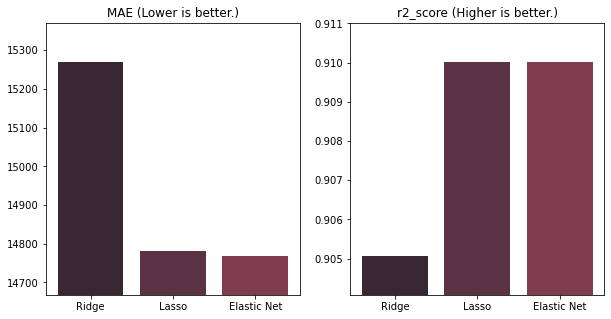

In [71]:
colors = ["#392834", "#5a3244", "#7e3c4d"]
model = ['Ridge', 'Lasso', 'Elastic Net']
mae = [15270.46, 14780.04, 14767.91]
r2 = [0.905076, 0.910009, 0.910005]
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
axs[0].bar(model, mae, color=colors)
axs[0].set_ylim(min(mae)-100, max(mae)+100)
axs[0].set_title('MAE (Lower is better.)')
axs[1].bar(model, r2, color=colors)
axs[1].set_ylim(min(r2)-.001, max(r2)+.001)
axs[1].set_title('r2_score (Higher is better.)')

By looking at the table and the graphs, we can see that Elastic Net model has the smallest MAE, `14767.91` followed by Lasso Regression model with a little larger error of `14780.04`. After that, Ridge comes with `15656.38`. We see similar trend with r2_score where higher score is better.

So, in our experiment, the best model is Elastic Net and the worst model is Ridge Regression. We can see that the difference in MAE between the best model and the worst model is significant.

## Performance Interpretation <a name="pi"></a>

We chose the mean absolute error (MAE) as our performance metric to evaluate and compare models and r2_score just out of curiousity. MAE presents a value that is easy to understand; it shows the average value of model error. For example, for our Elastic Net model, its MAE is `14767.91` which means that on average, Elastic Net will predict a value that is bigger or smaller than the true value by `14767.91`. Now to understand how good this MAE is, we need to know the range and distribution of the data. In our case, we need to see the values of the target variable `SalePrice` which contains the actual house prices. Let's see the violin plot, box plot, and histogram of `SalePrice` in our dataset:

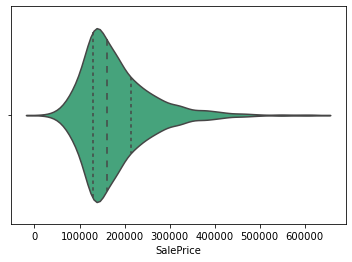

In [72]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

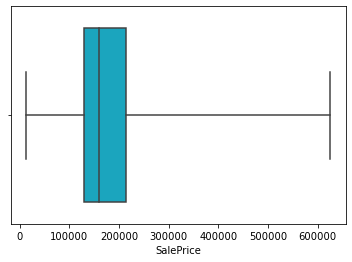

In [73]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

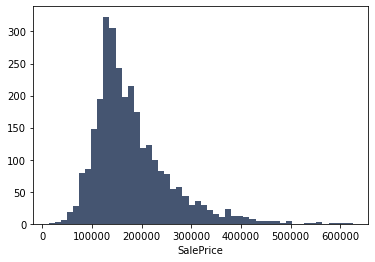

In [74]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

From the three plots above, we can understand the distribution of `SalePrice`. Now let's get some numerical statistical information about it:

In [75]:
y_train.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
SalePrice,2193.00,179846.69,79729.38,12789.00,128500.00,159895.00,214000.00,625000.00


We can see that the mean is `179,846.69` and the median is `159,895`. We can see also that the first quartile is `128,500`; this means that 75% of the data is larger than this number. Now looking at Elastic Net error of `14,767.91`, we can say that an error of about `14,000` is good for data whose mean is `159,895` and whose 75% of it is larger than `128,500`.

## Feature Importances <a name="fi"></a>

Although none of the models we used provide the ability to see the importance of each feature in the dataset after fitting the model, I've tried to extract those feature importances using the code below. We will look at the feature importances provided by all the three models that we've used. We have 242 features in our data which is a big number, so we will take a look at the 30 most important features.

### Ridge

Let's discover the most important features as determined by Ridge Regression model:

239 features, reduction of 1.24%


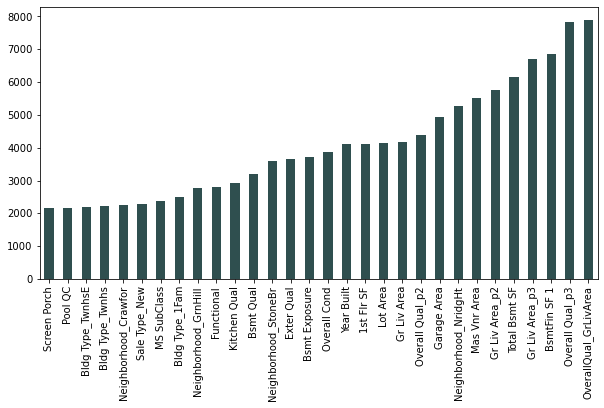

In [76]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(ridge_model.coef_[0]))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (10, 5), color = 'darkslategrey')

### Lasso

Now let's find the most important features as determined by our Lasso Regression model:

239 features, reduction of 1.24%


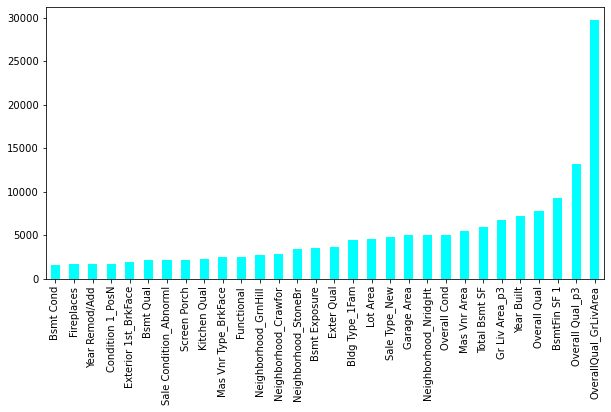

In [77]:
lasso_feature_importance = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

lasso_feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (10, 5), color = 'cyan')

### Elastic Net

And finally, let's see the most important features as determined by our Elastic Net model:

239 features, reduction of 1.24%


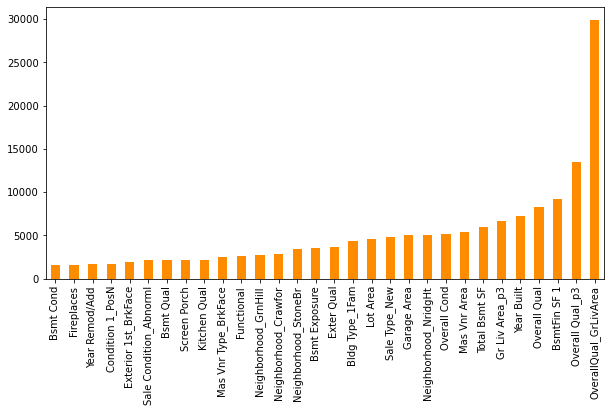

In [78]:
elastic_feature_importance = pd.Series(index = X_train.columns, data = np.abs(elasticNet_model.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

elastic_feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (10, 5), color = 'darkorange')

### Common Important Features

Now, let us see which features are among the most important features for both Elastic Net and Lasso, and let's find out the difference in their importance regarding the two models:

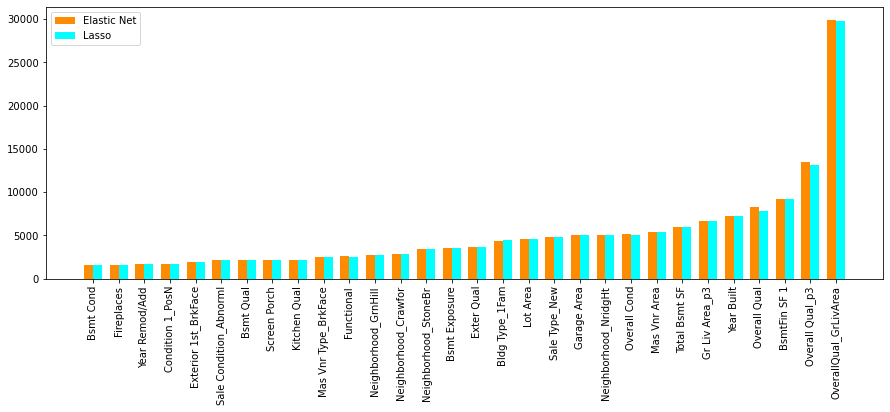

In [79]:
common_imp_feat = [x for x in elastic_feature_importance.sort_values().tail(30).index 
                   if x in lasso_feature_importance.sort_values().tail(30).index]
commImpFeat_elastic_scores = [elastic_feature_importance.sort_values().tail(30)[x]
                         for x in common_imp_feat]
commImpFeat_lasso_scores = [lasso_feature_importance.sort_values().tail(30)[x]
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_elastic_scores))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(ind - width/2, commImpFeat_elastic_scores, width, color='darkorange', label='Elastic Net');
ax.bar(ind + width/2, commImpFeat_lasso_scores, width, color='cyan', label='Lasso')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

# Key Findings <a name="kf"></a>
<hr>

We observe that Overall quality of material and finish of the house (`Overall Qual`) matter less in price prediction compared to living area above-ground in square feet (`GrLivArea`). We see that Lasso and Elastic Net perform way better than Ridge on our data. It is interesting to see that the difference in Mean Absolute Error of Lasso and Elastic Net is significant, while the difference in their coefficient of determination regression score (r2_score) is negligible. It is clear that Elastic Net performs best among the three models that we tried in this project.

# Conclusion <a name="c"></a>
<hr>

In this project, we built several regression models to predict the price of some house given some of the house features. We evaluated and compared each model to determine the one with highest performance. We also looked at how these models rank the features according to their importance. We followed the data science process starting with getting, cleaning and preprocessing the data, followed by exploring the data and building models, then evaluating the results and communicating them with visualizations.

As a recommendation, we advise to use this model (or a version of it trained with more recent data) by people who want to buy a house in the area covered by the dataset to have an idea about the actual price. The model can be used also with datasets that cover different cities and areas provided that they contain the same features. We also suggest that people take into consideration the features that were deemed as most important as seen in the previous section; this might help them estimate the house price better.

Since, the scope of this project is limited to supervised machine learning regression techniques, the methodology is inherently flawed in the sense that more advanced machine learning techniques could not be used for better accuracy in prediction. However, I’ve tried my best on interpretation of all three models using feature importance. I would be revisiting this project again with more advanced machine learning techniques like Neural Networks and Gradient Boosting, focusing more on prediction while doing my best regarding interpretation.